# Описание проекта
 
Проект состоит из двух частей: 1 - приоритизировать гипотезы, 2 - провести А/B-тестирование, проанализировать результаты.

## Описание данных
        - часть 1
        датафрейм hypothesis, состоящий из 5-ти столбцов: 

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

        - часть 2
        два датайфрейма:
    1) orders с заказами, состоящий из пяти столбцов
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

    2) visitors с посетителями, состоящий из трёх столбцов
* date — дата
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Загрузка библиотек

In [ ]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Загрузка и предобработка данных

In [2]:
try:
    hipothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hipothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

In [3]:
print(hipothesis.dtypes)
print()
print(orders.dtypes)
print()
print(visitors.dtypes)
print()

Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Efforts        int64
dtype: object

transactionId     int64
visitorId         int64
date             object
revenue           int64
group            object
dtype: object

date        object
group       object
visitors     int64
dtype: object



In [4]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [5]:
print(orders.dtypes)
print()
print(visitors.dtypes)
print()

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

date        datetime64[ns]
group               object
visitors             int64
dtype: object



In [6]:
display(hipothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [7]:
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [8]:
display(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [9]:
orders.duplicated().sum()

0

In [10]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

## Часть 1. Приоритизация гипотез.
### ICE

$$
ICE = \frac{Impact *Confidence}{ Efforts}
$$

In [11]:
def ice_score(row):
    impact = row['Impact']
    confidence = row['Confidence']
    efforts = row['Efforts']
    ice = impact * confidence / efforts
    return round(ice, 2)

hipothesis['ice'] = hipothesis.apply(ice_score, axis=1)
pd.options.display.max_colwidth = 100
hipothesis.sort_values('ice', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### RICE

$$
RICE = \frac{Reach* Impact * Confidence}{ Efforts}
$$

In [12]:
def rice_score(row):
    reach = row['Reach']
    impact = row['Impact']
    confidence = row['Confidence']
    efforts = row['Efforts']
    rice = reach * impact * confidence / efforts
    return round(rice, 2)

hipothesis['rice'] = hipothesis.apply(rice_score, axis=1)
pd.options.display.max_colwidth = 100
hipothesis.sort_values('rice', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Вывод по первой части

    Reach — скольких пользователей затронет изменение, которое вы хотите внести;
    Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
    Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
    Efforts — сколько стоит протестировать эту гипотезу. 

При проверки ICE и RICE для приоритизации гипотез параметры отличаются в Reach раз — чем большее количество пользователей затронет вносимое изменение, тем больший приоритет у гипотезы, поэтому гипотеза «Запустить акцию, дающую скидку на товар в день...» «переехала» с первого места (по параметру ICE) на пятое место, а вот гипотеза «Добавить форму подписки на все основные страницы...» переместилась с третьего на первое место, так как параметр Reach у неё самый высокий.

## Часть 2. Анализ A/B-теста
### 1. Построение графика кумулятивной выручки по группам

In [13]:
# проверяю, нет ли таких покупателей, которые попали в обе группы

vA = orders[orders['group']=='A']['visitorId'] 
vB = orders[orders['group']=='B']['visitorId']

lst = [i for i in vB if i in vA]
print(len(lst))

0


In [14]:
# Не совсем корректная проверка. 
# Попробуй сгруппироваться по id пользователей, взяв в качестве агрегационной функции (agg)  метод nunique для групп 
# и брать данные напрямую из orders. 
# Тогда в тех случаях, когда nunique будет равно два, это будет означать пересечения в двух группах одновременно

df = orders.groupby('visitorId').agg({'group':'nunique'})
print(df[df['group']==2].count())
print(orders[orders['group']=='A']['date'].count())
print(orders[orders['group']=='B']['date'].count())

group    58
dtype: int64
557
640


In [15]:
df = df[df['group']==2].reset_index()
df

,visitorId,group
0,8300375,2
1,199603092,2
2,232979603,2
3,237748145,2
4,276558944,2
5,351125977,2
6,393266494,2
7,457167155,2
8,471551937,2
9,477780734,2


В датафрейме с заказами оказалось 58 пользователей, которые попали в обе группы проверки. 

Количество пользователей небольшое, поэтому оставляю их как есть в решении.

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [17]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max',
          'transactionId' : 'nunique',
          'visitorId' : 'nunique',
          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [18]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max',
          'group' : 'max',
          'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [19]:
# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [20]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

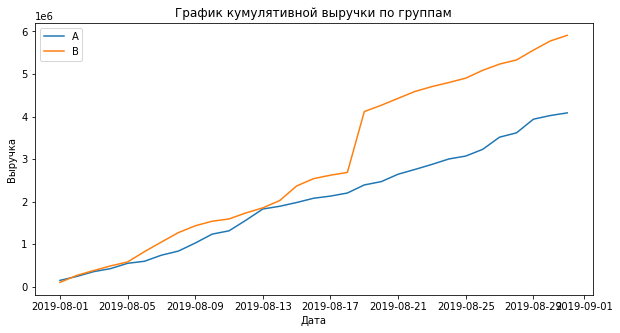

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title("График кумулятивной выручки по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.legend();

**Выводы и предположения**

Кумулятивная выручка по второй группе B показывает лучшие значения, но виден резкийвсплеск в середине тестирования, хотя группа А равномерно растёт. Можно предположить, что такой всплеск произошёл из-за крупных или частых заказов, он приходится на предпоследнюю неделю августа – родители усиленно готовят детей к школе или садам.

### 2. Построение графика кумулятивного среднего чека по группам

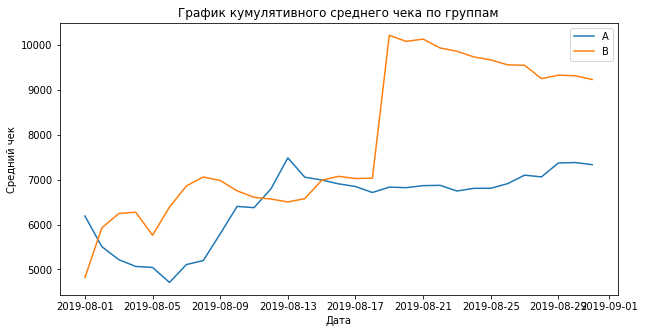

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.legend();

**Выводы и предположения** 

По графику кумулятивного среднего чека также можно проследить резкий всплеск у группы В. Средний чек группа В постепенно выравнивается к концу текста и растёт, а у группы В происходит очень резкий скачок, но после него значения равномерно уменьшаются — это может говорить о выбросах.

### 3. Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

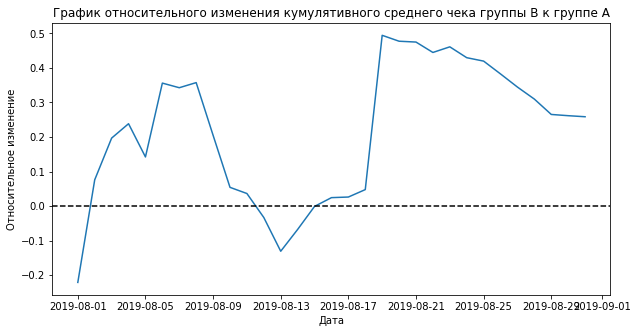

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

b = mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'] # отношение выручки гр. В к кол-ву заказов
a = mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'] # отношение выручки гр. А к кол-ву заказов

plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], b/a-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего чека группы В к группе А")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение");

**Выводы и предположения**

График относительного изменения также подтверждает наличие выбросов, так как изменение резко скачет.

### 4. Построение графика кумулятивного среднего количества заказов на посетителя по группам

In [24]:
cumulativeOrdersPerUserA = cumulativeData[cumulativeData['group']=='A'][['date', 'orders', 'visitors']]
cumulativeOrdersPerUserB = cumulativeData[cumulativeData['group']=='B'][['date', 'orders', 'visitors']]

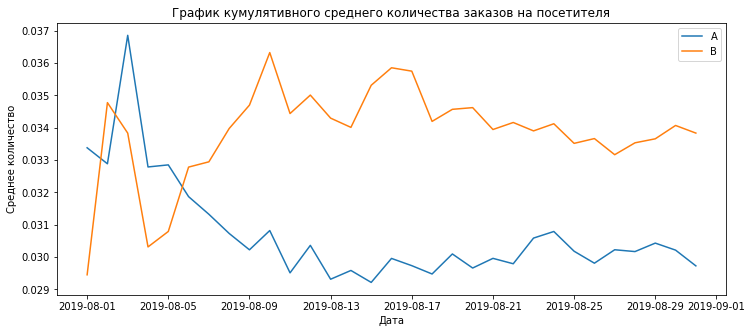

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(cumulativeOrdersPerUserA['date'], 
         cumulativeOrdersPerUserA['orders']/cumulativeOrdersPerUserA['visitors'], label='A')
plt.plot(cumulativeOrdersPerUserB['date'], 
         cumulativeOrdersPerUserB['orders']/cumulativeOrdersPerUserB['visitors'], label='B')
plt.legend()
plt.title("График кумулятивного среднего количества заказов на посетителя")
plt.xlabel("Дата")
plt.ylabel("Среднее количество");

**Выводы и предположения**
По графику кумулятивного среднего количества заказов на посетителя видно, что в группе В среднее количество заказов выше, но не стоит забывать про выбросы, которые также могут влиять на результат.

### 5.  Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

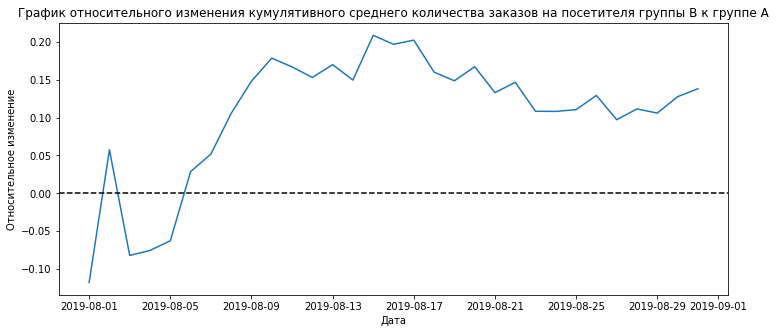

In [26]:
mergedCumulativeOrdersPerUser = cumulativeOrdersPerUserA.merge(cumulativeOrdersPerUserB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])
#mergedCumulativeOrdersPerUser
a = mergedCumulativeOrdersPerUser['ordersA']/mergedCumulativeOrdersPerUser['visitorsA']
b = mergedCumulativeOrdersPerUser['ordersB']/mergedCumulativeOrdersPerUser['visitorsB']

plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeOrdersPerUser['date'], b/a-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение");

**Выводы и  предположения**

Здесь график уже стабильнее, в начале есть резкие скачки, но в основном группа В показывает лучшие значения и выравнивается к концу теста

### 6. Построение точечного графика количества заказов по пользователям

In [27]:
# создание сгруппированных по пользователю данных
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'transactions']
ordersByUsers

,visitorId,transactions
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


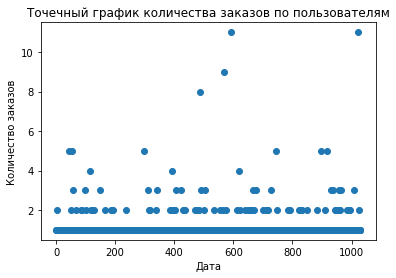

In [28]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactions'])
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel("Дата")
plt.ylabel("Количество заказов");

**Выводы и  предположения**

На точечном графике видно, что основная масса количества заказов приходится на 1-2 на пользователя, проверим точное наличие выбросов и определим верхнюю границу

### 7. Подсчёт 95-го и 99-го перцентилей количества заказов на пользователя. Граница для определения аномальных пользователей.

In [29]:
print(np.percentile(ordersByUsers['transactions'], [95, 99])) 

[2. 4.]


**Выводы и  предположения**

99% данных — менее 4 заказов на пользователя, делаем вывод, что нижняя граница аномальных пользователей — 4 заказов, от 1 до 3 — нормальные данные.

### 8. Построение точечного графика стоимостей заказов. 

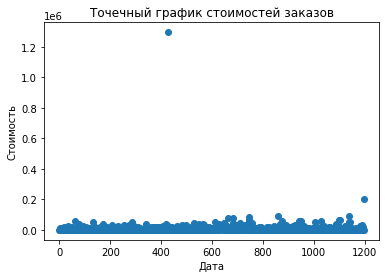

In [30]:
x_values = pd.Series(range(0, len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.title("Точечный график стоимостей заказов")
plt.xlabel("Дата")
plt.ylabel("Стоимость");

**Выводы и  предположения**

Видим, что основная масса стоимостей заказов находится в пределе до 100 тысяч рублей, проверим аномалии более точно с помощью перцентилей.

### 9. Подсчёт 95-го и 99-го перцентилей стоимости заказов. Границу для определения аномальных заказов.

In [31]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


**Выводы и  предположения**

Только один процент данных — это стоимость выше 58 тысяч рублей, хотя на диаграмме были заказы и в 200 тысяч и даже более 1 млн. Отсюда получаем верхнюю границу нормальных значений в 58 тысяч рублей.

### 10. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [33]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']

In [34]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

In [35]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [36]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [37]:
sampleA = pd.concat(
                    [ordersByUsersA['orders'],
                     pd.Series(
                               0,
                               index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                               name='orders',
                               ),
                    ],
                    axis=0,
                   )
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

In [38]:
sampleB = pd.concat(
                    [ordersByUsersB['orders'],
                     pd.Series(
                               0,
                               index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                               name='orders',
                               ),
                    ],
                    axis=0,
                   )
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

* **Нулевая гипотеза Н0:** Статистически значимых различий в среднем числе заказов между группами нет.
* **Альтернативная гипотеза Н1:** Статистически значимые различия в среднем числе заказов между группами есть.

In [39]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный выигрыш группы В = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный выигрыш группы В = 0.138


**Выводы и  предположения**

Значение p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 

Относительный выигрыш группы B равен 13.8%

### 11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

* **Нулевая гипотеза Н0:** Статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет.
* **Альтернативная гипотеза Н1:** Статистически значимые различия в среднем чеке заказа между группами по «сырым» данным есть.

In [40]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

print('Относительный выигрыш группы В = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                                                        orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Относительный выигрыш группы В = 0.259


**Выводы и  предположения**

Значение p-value = 0.729 больше 0.05. Значит, не отвергаем нулевую гипотезу о том, что в среднем чеке **нет** различий.

Относительный выигрыш группы B = 0.259

### 12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

* **Нулевая гипотеза Н0:** Статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет.
* **Альтернативная гипотеза Н1:** Статистически значимые различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть.

In [41]:
# узнаем, сколько в данных имеется аномальных пользователей
      
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['transactions'], [99]))]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['transactions'], [99]))]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [99]))]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
15


In [42]:
# всего 15 аномальных пользователей
# узнаем, как их действия повлияли на результаты теста
sampleAFiltered = pd.concat(
                        [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                         pd.Series(0,
                                   index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                   name='orders')
                        ],axis=0)
sampleBFiltered = pd.concat(
                        [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                         pd.Series(0,
                                   index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                   name='orders')
                        ],axis=0)

In [43]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительный выигрыш группы В {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.014
относительный выигрыш группы В 0.153


**Выводы и  предположения**

Значение p-value = 0.014 по-прежнему меньше 0.05. Относительный выигрыш группы B равен 15.3%
Результаты по среднему количеству заказов практически не изменились. 

### 13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

* **Нулевая гипотеза Н0:** Статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет.
* **Альтернативная гипотеза Н1:** Статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным есть.

In [44]:
print('p-value = {0:.3f}'.format(
    stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                              np.logical_not(orders['transactionId'].isin(abnormalUsers)))]['revenue'],
                       orders[np.logical_and(orders['group'] == 'B',
                              np.logical_not(orders['transactionId'].isin(abnormalUsers)))]['revenue'],
                       )[1]
                                )
      )

print("относительный выигрыш группы В = {0:.3f}".format(
        orders[np.logical_and(orders['group'] == 'B',
                              np.logical_not(orders['transactionId'].isin(abnormalUsers)))]['revenue'].mean()
        / 
        orders[np.logical_and(orders['group'] == 'A',
               np.logical_not(orders['transactionId'].isin(abnormalUsers)))]['revenue'].mean()- 1
                                                       )
      )

p-value = 0.729
относительный выигрыш группы В = 0.259


**Выводы и  предположения**

Так как значение p-value = 0.729 больше 0.05, значит не отвергаем нулевую гипотезу от том, что различий нет.

Здесь так же не изменились результаты исследования по сравнению с «сырыми» данными, поэтому аномальные пользователи никак не влияют на результат.

### 14. Принятие решения о проведении теста.

Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Имеющиеся факты:

* Статистически значимое различие по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий есть;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия среднего количества заказов между группами сообщает, что результаты группы B **лучше** группы A:


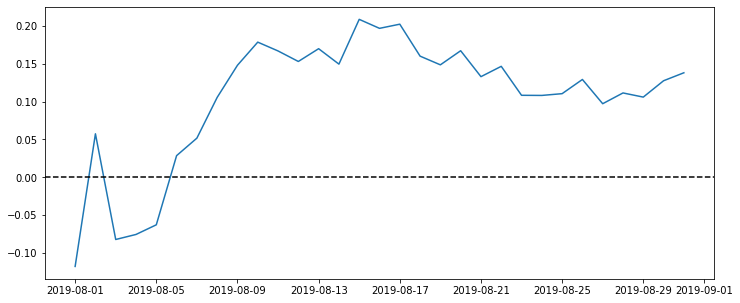

In [45]:
a = data['ordersCummulativeA']/data['visitorsCummulativeA']
b = data['ordersCummulativeB']/data['visitorsCummulativeB']

plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeOrdersPerUser['date'], b/a-1)
plt.axhline(y=0, color='black', linestyle='--');

* График различия среднего чека говорит о том, что результаты группы B колеблются, но стабильно показывают лучшие результаты к концу тестирования:

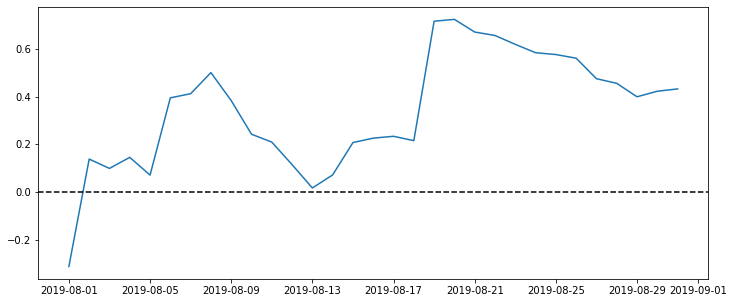

In [46]:
a = data['revenueCummulativeA']/data['visitorsCummulativeA']
b = data['revenueCummulativeB']/data['visitorsCummulativeB']

plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeOrdersPerUser['date'], b/a-1)
plt.axhline(y=0, color='black', linestyle='--');

Исходя из обнаруженных фактов, тест следует остановить, признать его успешным, зафиксировать победу группы В. Продолжать смысла нет, так как группа В уже показывает лучшие результаты.